<a href="https://colab.research.google.com/github/purnomoyusgiantoro/30-HARI-BELAJAR-COMPUTER-VISON/blob/main/Image_Recognition_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [14]:
alexnet = models.AlexNet()

In [15]:
resnet = models.resnet101(pretrained=True)
resnet

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

Saving kucingpersia.jpeg to kucingpersia (1).jpeg


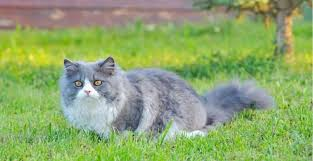

In [25]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
img = Image.open("kucingpersia.jpeg")
img

In [29]:
img_t = preprocess(img)

In [30]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[ 5.0649e-01, -1.9723e+00, -2.5485e+00, -2.1301e+00, -2.7661e+00,
          6.1071e-01, -2.8564e+00, -2.5647e+00, -7.6682e-01,  1.8546e+00,
          2.5722e+00, -1.1188e+00, -1.7095e+00,  5.2683e-01, -1.2162e+00,
          1.2921e+00,  1.5221e-01,  4.4624e-01, -3.0752e-01, -1.6620e+00,
          3.0720e+00,  2.9829e+00,  1.2158e+00, -1.3672e+00,  2.6819e+00,
         -1.8288e+00, -3.2965e-01, -4.9082e-01, -5.2442e-01, -1.3274e+00,
          6.0049e-01, -6.5331e-01, -1.1481e+00, -3.9648e+00, -1.6113e+00,
         -1.2815e+00, -4.0493e-01, -2.8078e+00,  1.1239e-01, -1.1082e+00,
         -1.8368e+00, -9.4927e-01, -3.1502e+00,  4.4032e-04, -7.8054e-01,
         -4.1782e+00, -2.3203e+00, -1.1116e-01, -8.7631e-01, -5.1017e-01,
         -6.4257e-01,  1.3186e+00, -9.0867e-01, -4.0898e-01, -2.9987e+00,
         -7.6220e-01, -3.6349e+00, -2.3118e+00, -7.4195e-01,  2.2145e+00,
         -6.4816e-02, -2.9469e+00,  1.0233e+00, -1.2623e+00, -2.3389e-01,
         -1.0101e+00,  1.2543e+00, -1.

In [31]:
# Download the imagenet_classes.txt file if it's not already present
import os
if not os.path.exists('imagenet_classes.txt'):
    !wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

In [32]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('Persian cat', 90.11951446533203)